In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from candidate_selection_multi import *

In [2]:
z = np.load("data_scarce.npz")
data_scarce = list(z['arr_0'])
z = np.load("data_abundant.npz")
data_abundant = list(z['arr_0'])
z = np.load("data_wrong_prior.npz")
data_wrong_prior = list(z['arr_0'])

In [4]:
max_Q = 10
beta = 0.1
R = construct_R(max_Q)
P0 = construct_P(max_Q,0)
P1 = construct_P(max_Q,1)
P2 = construct_P(max_Q,2)
T = 10
n = len(R)
init = np.zeros((2,n))
init[0][0] = 0.5
init[1][4] = 0.5

alpha = 0.3
gamma0 = 0.2
gamma1 = 0.2
rel_1_fair = solve_lp_WCMDP(T,init,P0,P1,P2,R,alpha,gamma0,gamma1,beta)[0]
print("rel abundant with fairness constraints is "+str(rel_1_fair))
rel_1_unfair = solve_lp_WCMDP_unfair(T,init,P0,P1,P2,R,alpha,beta)[0]
print("rel abundant without fairness constraints is "+str(rel_1_unfair))

alpha = 0.15
gamma0 = 0.1
gamma1 = 0.1
rel_2_fair = solve_lp_WCMDP(T,init,P0,P1,P2,R,alpha,gamma0,gamma1,beta)[0]
print("rel scarce with fairness constraints is "+str(rel_2_fair))
rel_2_unfair = solve_lp_WCMDP_unfair(T,init,P0,P1,P2,R,alpha,beta)[0]
print("rel scarce without fairness constraints is "+str(rel_2_unfair))

init = np.zeros((2,n))
init[0][0] = 0.5
init[1][5] = 0.5
rel_3_fair = solve_lp_WCMDP(T,init,P0,P1,P2,R,alpha,gamma0,gamma1,beta)[0]
print("rel scarce correct prior with fairness constraints is "+str(rel_3_fair))
rel_3_unfair = solve_lp_WCMDP_unfair(T,init,P0,P1,P2,R,alpha,beta)[0]
print("rel scarce correct prior without fairness constraints is "+str(rel_3_unfair))

rel abundant with fairness constraints is 0.8757908670238096
rel abundant without fairness constraints is 0.8757908724025972
rel scarce with fairness constraints is 0.845159928679487
rel scarce without fairness constraints is 0.8583026501582554
rel scarce correct prior with fairness constraints is 0.9128877005757575
rel scarce correct prior without fairness constraints is 0.9224526477380952


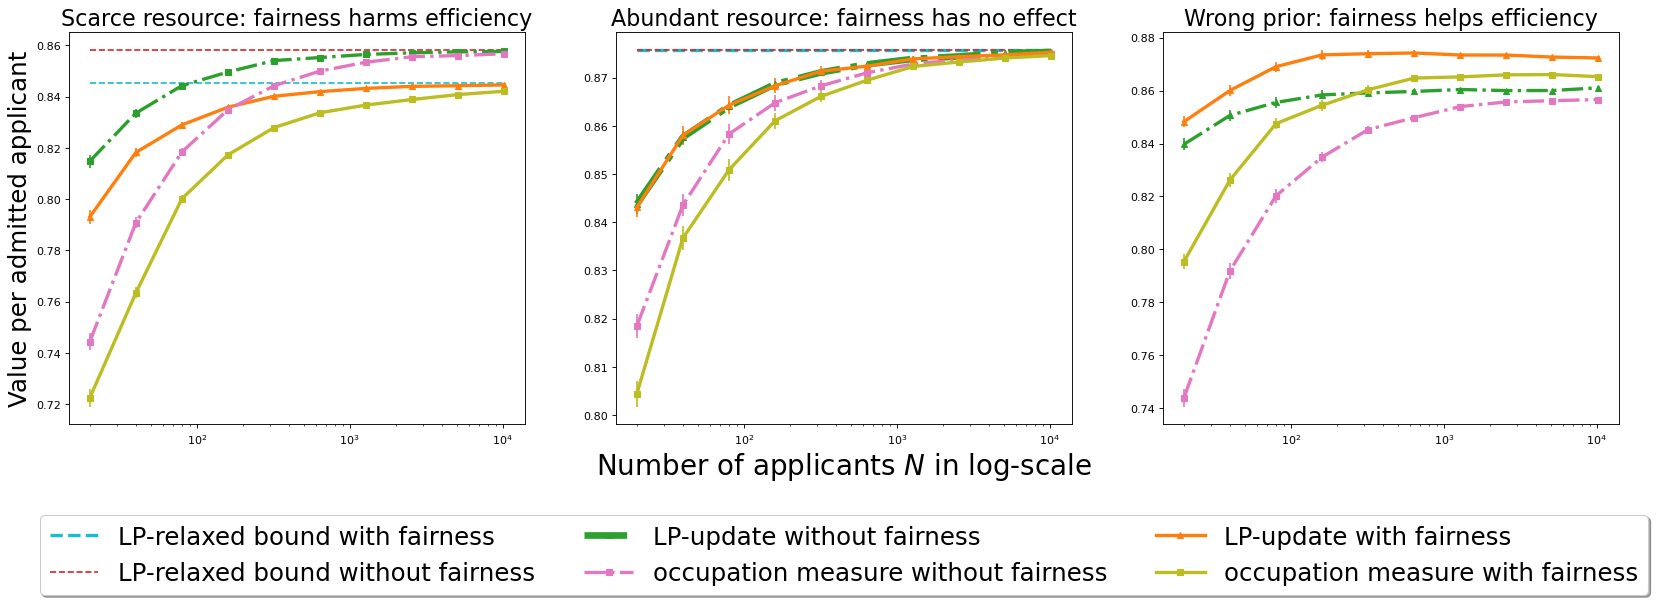

In [19]:
myN = np.array([20*2**n for n in range(0,10)])
fig,(ax2,ax1,ax3) = plt.subplots(1,3,num=None,figsize=(25, 6.5),dpi=80,facecolor='w', edgecolor='k')
plt.rc('legend',fontsize= 22)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors_default = prop_cycle.by_key()['color']

colors = { 'upperbound_unfair':colors_default[3], 'upperbound_fair':colors_default[9], 'LP_update_fair':colors_default[1],
           'LP_update_unfair':colors_default[2], 'random':colors_default[5], 'interview_all':colors_default[0],
          'OM_fair':colors_default[8],'OM_unfair':colors_default[6]
         }

ax1.semilogx(myN, myN*0+rel_1_fair, '--',color=colors['upperbound_fair'],label='LP-relaxed bound with fairness',lw=3)
ax1.semilogx(myN, myN*0+rel_1_unfair, '--',color=colors['upperbound_unfair'],label='LP-relaxed bound without fairness',lw=1.5)
for i,item in enumerate(data_abundant):
    mean = item[0]
    var = item[1]
    if i == 0:
        ax1.errorbar(myN, mean,var,color=colors['LP_update_unfair'],linestyle='None')
        ax1.plot(myN, mean,'-.^',color=colors['LP_update_unfair'],label="LP-update without fairness",lw=6)
    elif i == 1:
        ax1.errorbar(myN,mean,var,color=colors['OM_unfair'],linestyle='None')
        ax1.plot(myN,mean,'-.s',color=colors['OM_unfair'],label="occupation measure without fairness",lw=3)
    elif i == 2:
        ax1.errorbar(myN,mean,var,color=colors['LP_update_fair'],linestyle='None')
        ax1.plot(myN,mean,'-^',color=colors['LP_update_fair'],label="LP-update with fairness",lw=3)
    elif i == 3:
        ax1.errorbar(myN,mean,var,color=colors['OM_fair'],linestyle='None')
        ax1.plot(myN,mean,'-s',color=colors['OM_fair'],label="occupation measure with fairness",lw=3)         
    """
    elif i == 4:
        ax1.errorbar(myN,mean,var,color=colors['random'],linestyle='None')
        ax1.plot(myN,mean,':o',color=colors['random'],label='interview randomly',lw=3)
    elif i == 5:
        ax1.errorbar(myN,mean,var,color=colors['interview_all'],linestyle='None')
        ax1.plot(myN,mean,':o',color=colors['interview_all'],label='interview all',lw=3)
    """

ax1.set_xlabel(r'Number of applicants $N$ in log-scale',fontsize=25)
ax1.set_title(r"Abundant resource: fairness has no effect",fontsize=20)


ax2.semilogx(myN, myN*0+rel_2_unfair, '--',color=colors['upperbound_unfair'],label='LP-relaxed bound with fairness')
ax2.semilogx(myN, myN*0+rel_2_fair, '--',color=colors['upperbound_fair'],label='LP-relaxed bound without fairness')
for i,item in enumerate(data_scarce):
    mean = item[0]
    var = item[1]
    if i == 0:
        ax2.errorbar(myN, mean,var,color=colors['LP_update_fair'],linestyle='None')
        ax2.plot(myN, mean,'-^',color=colors['LP_update_fair'],label="LP-update with fairness",lw=3)
    elif i == 1:
        ax2.errorbar(myN,mean,var,color=colors['LP_update_unfair'],linestyle='None')
        ax2.plot(myN,mean,'-.s',color=colors['LP_update_unfair'],label="LP-update without fairness",lw=3)
    elif i == 2:
        ax2.errorbar(myN,mean,var,color=colors['OM_fair'],linestyle='None')
        ax2.plot(myN,mean,'-s',color=colors['OM_fair'],label="occupation measure with fairness",lw=3)
    elif i == 3:
        ax2.errorbar(myN,mean,var,color=colors['OM_unfair'],linestyle='None')
        ax2.plot(myN,mean,'-.s',color=colors['OM_unfair'],label="occupation measure without fairness",lw=3)

ax2.set_ylabel('Value per admitted applicant',fontsize=22)   
ax2.set_title(r"Scarce resource: fairness harms efficiency",fontsize=20)
       
#ax3.semilogx(myN, myN*0+rel_3, '--',color=colors['upperbound_fair'],label='LP-relaxed bound (fair)')
for i,item in enumerate(data_wrong_prior):
    mean = item[0]
    var = item[1]
    if i == 0:
        ax3.errorbar(myN, mean,var,color=colors['LP_update_unfair'],linestyle='None')
        ax3.semilogx(myN, mean,'-.^',color=colors['LP_update_unfair'],label="LP-update without fairness",lw=3)
    elif i == 1:
        ax3.errorbar(myN,mean,var,color=colors['OM_unfair'],linestyle='None')
        ax3.plot(myN,mean,'-.s',color=colors['OM_unfair'],label="occupation measure without fairness",lw=3)
    elif i == 2:
        ax3.errorbar(myN,mean,var,color=colors['LP_update_fair'],linestyle='None')
        ax3.plot(myN,mean,'-^',color=colors['LP_update_fair'],label="LP-update with fairness",lw=3)
    elif i == 3:
        ax3.errorbar(myN,mean,var,color=colors['OM_fair'],linestyle='None')
        ax3.plot(myN,mean,'-s',color=colors['OM_fair'],label="occupation measure with fairness",lw=3) 
    """
    elif i == 4:
        ax3.errorbar(myN,mean,var,color=colors['random'],linestyle='None')
        ax3.plot(myN,mean,':o',color=colors['random'],label='interview randomly',lw=3)
    elif i == 5:
        ax3.errorbar(myN,mean,var,color=colors['interview_all'],linestyle='None')
        ax3.plot(myN,mean,':o',color=colors['interview_all'],label='interview all',lw=3)
    """
        
ax3.set_title(r"Wrong prior: fairness helps efficiency",fontsize=20)  

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=True, ncol=3)

plt.savefig('candidate_selection_multi1.pdf', bbox_inches='tight')

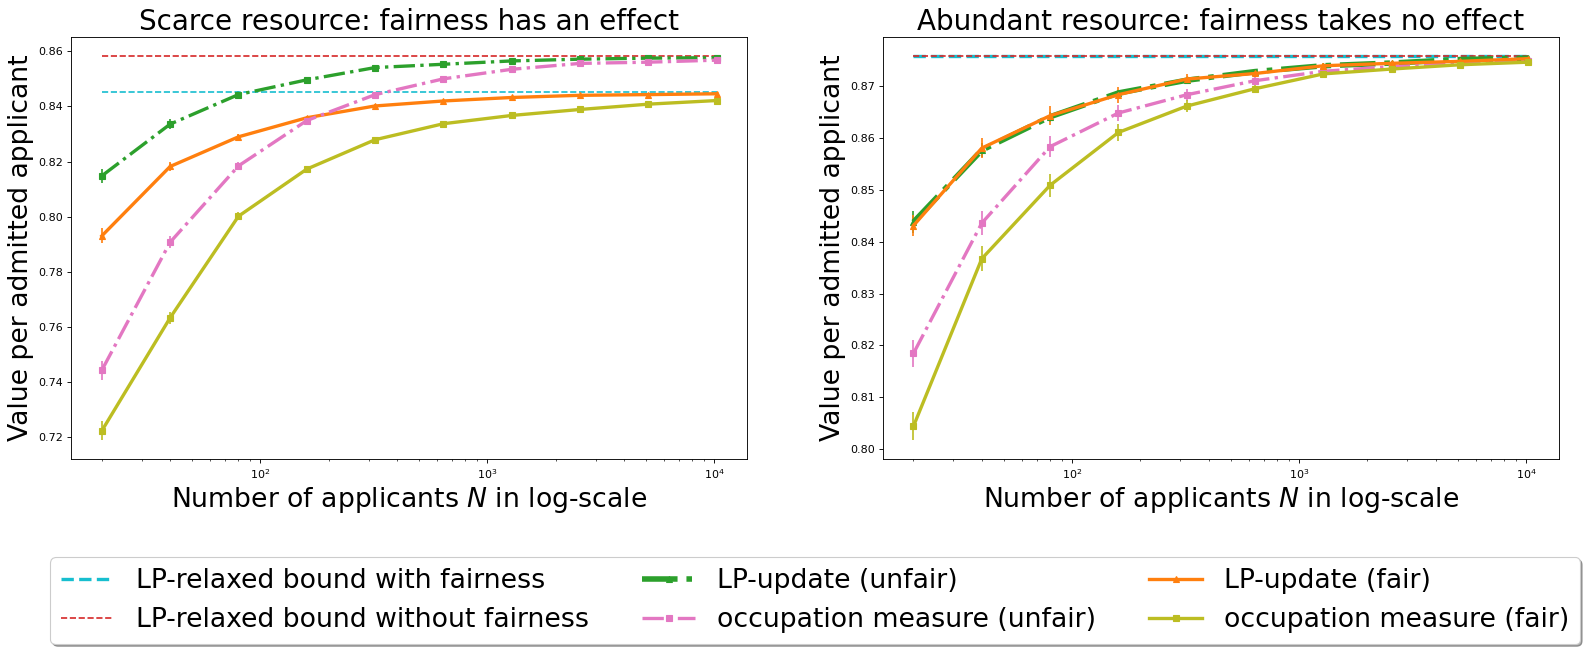

In [21]:
myN = np.array([20*2**n for n in range(0,10)])
fig,(ax2,ax1) = plt.subplots(1,2,num=None,figsize=(24, 7),dpi=80,facecolor='w', edgecolor='k')
plt.rc('legend',fontsize= 24)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors_default = prop_cycle.by_key()['color']

colors = { 'upperbound_unfair':colors_default[3], 'upperbound_fair':colors_default[9], 'LP_update_fair':colors_default[1],
           'LP_update_unfair':colors_default[2], 'random':colors_default[5], 'interview_all':colors_default[0],
          'OM_fair':colors_default[8],'OM_unfair':colors_default[6]

         }
ax1.semilogx(myN, myN*0+rel_1_fair, '--',color=colors['upperbound_fair'],label='LP-relaxed bound with fairness',lw=3)
ax1.semilogx(myN, myN*0+rel_1_unfair, '--',color=colors['upperbound_unfair'],label='LP-relaxed bound without fairness')
for i,item in enumerate(data_abundant):
    mean = item[0]
    var = item[1]
    if i == 0:
        ax1.errorbar(myN, mean,var,color=colors['LP_update_unfair'],linestyle='None')
        ax1.plot(myN, mean,'-.^',color=colors['LP_update_unfair'],label="LP-update (unfair)",lw=5)
    elif i == 1:
        ax1.errorbar(myN,mean,var,color=colors['OM_unfair'],linestyle='None')
        ax1.plot(myN,mean,'-.s',color=colors['OM_unfair'],label="occupation measure (unfair)",lw=3)
    elif i == 2:
        ax1.errorbar(myN,mean,var,color=colors['LP_update_fair'],linestyle='None')
        ax1.plot(myN,mean,'-^',color=colors['LP_update_fair'],label="LP-update (fair)",lw=3)
    elif i == 3:
        ax1.errorbar(myN,mean,var,color=colors['OM_fair'],linestyle='None')
        ax1.plot(myN,mean,'-s',color=colors['OM_fair'],label="occupation measure (fair)",lw=3) 
    """
    elif i == 4:
        ax1.errorbar(myN,mean,var,color=colors['random'],linestyle='None')
        ax1.plot(myN,mean,':o',color=colors['random'],label='interview randomly',lw=3)
    elif i == 5:
        ax1.errorbar(myN,mean,var,color=colors['interview_all'],linestyle='None')
        ax1.plot(myN,mean,':o',color=colors['interview_all'],label='interview all',lw=3)
    """

ax1.set_xlabel(r'Number of applicants $N$ in log-scale',fontsize=24)
ax1.set_ylabel('Value per admitted applicant',fontsize=24)
ax1.set_title(r"Abundant resource: fairness takes no effect",fontsize=25)


ax2.semilogx(myN, myN*0+rel_2_unfair, '--',color=colors['upperbound_unfair'],label='LP-relaxed bound fair')
ax2.semilogx(myN, myN*0+rel_2_fair, '--',color=colors['upperbound_fair'],label='LP-relaxed bound unfair')
for i,item in enumerate(data_scarce):
    mean = item[0]
    var = item[1]
    if i == 0:
        ax2.errorbar(myN, mean,var,color=colors['LP_update_fair'],linestyle='None')
        ax2.plot(myN, mean,'-^',color=colors['LP_update_fair'],label="LP-update (fair)",lw=3)
    elif i == 1:
        ax2.errorbar(myN,mean,var,color=colors['LP_update_unfair'],linestyle='None')
        ax2.plot(myN,mean,'-.s',color=colors['LP_update_unfair'],label="LP-update (unfair)",lw=3)
    elif i == 2:
        ax2.errorbar(myN,mean,var,color=colors['OM_fair'],linestyle='None')
        ax2.plot(myN,mean,'-s',color=colors['OM_fair'],label="occupation measure (fair)",lw=3)
    elif i == 3:
        ax2.errorbar(myN,mean,var,color=colors['OM_unfair'],linestyle='None')
        ax2.plot(myN,mean,'-.s',color=colors['OM_unfair'],label="occupation measure (unfair)",lw=3)

ax2.set_xlabel(r'Number of applicants $N$ in log-scale',fontsize=24)
ax2.set_ylabel('Value per admitted applicant',fontsize=24)   
ax2.set_title(r"Scarce resource: fairness has an effect",fontsize=25)
       
        
ax1.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.2),fancybox=True, shadow=True, ncol=3)

plt.savefig('candidate_selection_multi2.pdf', bbox_inches='tight')